### test

In [21]:
import json
import random
from collections import defaultdict

In [6]:
gt_path = "/media/ags/DATA/CODE/kaggle/lyft-3d-object-detection/data/lyft/train/gt_data_val.json"
pred_path = "/home/ags/second_test/all.pp.lowa.config.4/results/step_304785/pred_data_val.json" 

In [11]:
!du -sh {pred_path}

172M	/home/ags/second_test/all.pp.lowa.config.4/results/step_304785/pred_data_val.json


In [7]:
with open(str(pred_path)) as f:
    predictions = json.load(f)

with open(str(gt_path)) as f:
    gt = json.load(f)

In [8]:
len(predictions)

475081

In [9]:
len(gt)

113896

In [12]:
gt[0]

{'sample_token': 'f7fca7320eaf90ffc6d20bf5477a18ca61c042979eaaf0cda36603e1a969dad9',
 'translation': [1002.3932119976462, 2517.525612249236, -21.410812547321655],
 'size': [1.999, 4.817, 1.636],
 'rotation': [-0.9905516179554115, 0, 0, 0.13714041040450659],
 'name': 'car'}

In [14]:
gtname2box = defaultdict(list) 
for g in gt:
    gtname2box[g['name']].append(g)
predname2box = defaultdict(list) 
for g in predictions:
    predname2box[g['name']].append(g)

In [ ]:
!mkdir tmp

In [32]:
gt_final = []
for c, b in gtname2box.items():
    gt_final.extend(b[:1000])
    
random.shuffle(gt_final)
with open('tmp/gt_data.json', 'w') as f:
    json.dump(gt_final, f)

In [33]:
pred_final = []
for c, b in predname2box.items():
    pred_final.extend(b[:1000])
random.shuffle(pred_final)
with open('tmp/pred_data.json', 'w') as f:
    json.dump(pred_final, f)

In [1]:
    class_names = ['car', 'bicycle', 'animal', 'bus', 'emergency_vehicle',
            'other_vehicle', 'motorcycle', 'pedestrian', 'truck']



In [2]:
sorted(class_names)

['animal',
 'bicycle',
 'bus',
 'car',
 'emergency_vehicle',
 'motorcycle',
 'other_vehicle',
 'pedestrian',
 'truck']

In [161]:
from pathlib import Path

In [162]:
base_dir = Path('../data/KITTI/object/training/')

In [163]:
!ls {base_dir} 

calib  image_2	label_2  velodyne


In [164]:
calib = base_dir / 'calib/000001.txt' 

image = base_dir / 'image/000000.txt' 
label = base_dir / 'label/000000.txt' 
velodyne = base_dir / 'velodyne/000000.txt' 

In [165]:
calibrations = calib.open().read()

In [166]:
calibrations.split()#[:13] # P0: 12 elements

['P0:',
 '7.215377000000e+02',
 '0.000000000000e+00',
 '6.095593000000e+02',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '7.215377000000e+02',
 '1.728540000000e+02',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '1.000000000000e+00',
 '0.000000000000e+00',
 'P1:',
 '7.215377000000e+02',
 '0.000000000000e+00',
 '6.095593000000e+02',
 '-3.875744000000e+02',
 '0.000000000000e+00',
 '7.215377000000e+02',
 '1.728540000000e+02',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '1.000000000000e+00',
 '0.000000000000e+00',
 'P2:',
 '7.215377000000e+02',
 '0.000000000000e+00',
 '6.095593000000e+02',
 '4.485728000000e+01',
 '0.000000000000e+00',
 '7.215377000000e+02',
 '1.728540000000e+02',
 '2.163791000000e-01',
 '0.000000000000e+00',
 '0.000000000000e+00',
 '1.000000000000e+00',
 '2.745884000000e-03',
 'P3:',
 '7.215377000000e+02',
 '0.000000000000e+00',
 '6.095593000000e+02',
 '-3.395242000000e+02',
 '0.000000000000e+00',
 '7.215377000000e+02',


In [40]:
# P0, P1, P2, P3, R0_rect (9 elements), Tr_velo_to_cam, Tr_imu_to_velo rest all having 12 elements

The point cloud file contains the location of a point and its reflectance in the lidar co-ordinate.

The calibration file contains the values of 6 matrices — P0–3, R0_rect, Tr_velo_to_cam, and Tr_imu_to_velo.

### Labels:

In [41]:

# per image: Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01
# Truck 0.00 0 -1.57 599.41 156.40 629.75 189.25 2.85 2.63 12.34 0.47 1.49 69.44 -1.56
# Car 0.00 0 1.85 387.63 181.54 423.81 203.12 1.67 1.87 3.69 -16.53 2.39 58.49 1.57
# Cyclist 0.00 3 -1.65 676.60 163.95 688.98 193.93 1.86 0.60 2.02 4.59 1.32 45.84 -1.55
# DontCare -1 -1 -10 503.89 169.71 590.61 190.13 -1 -1 -1 -1000 -1000 -1000 -10
# DontCare -1 -1 -10 511.35 174.96 527.81 187.45 -1 -1 -1 -1000 -1000 -1000 -10
# DontCare -1 -1 -10 532.37 176.35 542.68 185.27 -1 -1 -1 -1000 -1000 -1000 -10

 The label files contains the bounding box for objects in 2D and 3D in text. Each row of the file is one object and contains 15 values , including the tag (e.g. Car, Pedestrian, Cyclist). The 2D bounding boxes are in terms of pixels in the camera image . The 3D bounding boxes are in 2 co-ordinates. The size ( height, weight, and length) are in the object co-ordinate , and the center on the bounding box is in the camera co-ordinate.


In [1]:
import os
import pdb
import os.path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import matplotlib.patches as patches
from   matplotlib.path import Path
from matplotlib import colors
import numpy as np
from PIL import Image
from math import sin, cos
import argparse

In [2]:
def loadKittiFiles (frame) :
    '''
    Load KITTI image (.png), calibration (.txt), velodyne (.bin), and label (.txt),  files
    corresponding to a shot.
    Args:
    frame :  name of the shot , which will be appended to externsions to load
                the appropriate file.
    '''
    # load image file 
    fn = basedir+ left_cam_rgb + frame+'.png'
    fn = os.path.join(basedir, left_cam_rgb, frame+'.png')
    left_cam = Image.open(fn).convert ('RGB')

    # load velodyne file 
    fn = basedir+ velodyne + frame+'.bin'
    fn = os.path.join(basedir, velodyne, frame+'.bin')
    velo = np.fromfile(fn, dtype=np.float32).reshape(-1, 4)

    # load calibration file
    fn = basedir+ calib + frame+'.txt'
    fn = os.path.join(basedir, calib, frame+'.txt')
    calib_data = {}
    with open (fn, 'r') as f :
        for line in f.readlines():
            if ':' in line :
                key, value = line.split(':', 1)
                calib_data[key] = np.array([float(x) for x in value.split()])

    # load label file
    fn = basedir+ label + frame+'.txt'
    fn = os.path.join(basedir, label, frame+'.txt')
    label_data = {}
    with open (fn, 'r') as f :
        for line in f.readlines():
            if len(line) > 3:
                key, value = line.split(' ', 1)
                #print ('key', key, 'value', value)
                if key in label_data.keys() :
                    label_data[key].append([float(x) for x in value.split()] )
                else:
                    label_data[key] =[[float(x) for x in value.split()]]

    for key in label_data.keys():
        label_data[key] = np.array( label_data[key])

    return left_cam, velo, label_data, calib_data

In [10]:
def computeBox3D(label, P):
    '''
    takes an object label and a projection matrix (P) and projects the 3D
    bounding box into the image plane.
    (Adapted from devkit_object/matlab/computeBox3D.m)
    Args:
    label -  object label list or array
    '''
    w = label[7]
    h = label[8]
    l = label[9]
    x = label[10]
    y = label[11]
    z = label[12]
    ry = label[13]

    # compute rotational matrix around yaw axis
    R = np.array([ [+cos(ry), 0, +sin(ry)],
                 [0, 1,               0],
                 [-sin(ry), 0, +cos(ry)] ] )

    # 3D bounding box corners
    #The size ( height, weight, and length) are in the object co-ordinate , 
    #and the center on the bounding box is in the camera co-ordinate.
    #pdb.set_trace()
    x_corners = [0, l, l, l, l, 0, 0, 0] # -l/2
    y_corners = [0, 0, h, h, 0, 0, h, h] # -h
    z_corners = [0, 0, 0, w, w, w, w, 0] # --w/2
    #So, length: x axis, width: z axis and height: y axis????
    x_corners += -l/2 ### this operation is possible because `l` is numpy.float64
    y_corners += -h
    z_corners += -w/2
    ### now x,y,z corners are w.r.t center inside ground, at depth of h/2
    
    # bounding box in object co-ordinate 
    #What does object co-ordinate mean? where is its origin?
    corners_3D = np.array([x_corners, y_corners, z_corners])
    #print ( 'corners_3d', corners_3D.shape, corners_3D)

    # rotate 
    corners_3D = R.dot(corners_3D)
    #print ( 'corners_3d', corners_3D.shape, corners_3D)

    #translate 
    corners_3D += np.array([x, y, z]).reshape((3,1))
    #print ( 'corners_3d', corners_3D)
    '''
    trackletBox = np.array([
    [-l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2],
    [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2],
    [0.0, 0.0, 0.0, 0.0, h, h, h, h]])
#     yaw = rotation[2]  # other rotations are supposedly 0
    yaw = ry
    rotMat = np.array([
        [np.cos(yaw), -np.sin(yaw), 0.0],
        [np.sin(yaw), np.cos(yaw), 0.0],
        [0.0, 0.0, 1.0]
    ])
    corners_3D = np.dot(rotMat, trackletBox)
    corners_3D += np.array([x, y, z]).reshape((3,1))
    '''
#     pdb.set_trace()
    corners_3D_1 = np.vstack((corners_3D,np.ones((corners_3D.shape[-1]))))
    corners_2D = P.dot(corners_3D_1) # 3x4 @ 4x8
    corners_2D = corners_2D/corners_2D[2] ## what is this?

    # edges, lines 3d/2d bounding box in vertex index 
    edges = [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,0], [0,5], [1,4], [2,7], [3, 6]]
    lines = [[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,0], [0,5], [5, 4], [4, 1], [1,2], [2,7], [7,6], [6,3]]
    bb3d_lines_verts_idx = [0,1,2,3,4,5,6,7,0,5,4,1,2,7,6,3]

    bb2d_lines_verts = corners_2D[:,bb3d_lines_verts_idx] # 

    return corners_2D[:2], corners_3D, bb2d_lines_verts[:2]

In [11]:
def labelToBoundingBox(ax, labeld, calibd):
    # Velodyne to/from referenece camera (0) matrix
    Tr_velo_to_cam = np.zeros((4,4))
    Tr_velo_to_cam[3,3] = 1
    Tr_velo_to_cam[:3,:4] = calibd['Tr_velo_to_cam'].reshape(3,4)
    Tr_cam_to_velo = np.linalg.inv(Tr_velo_to_cam)
    
    R0_rect = np.zeros ((4,4))
    R0_rect[:3,:3] = calibd['R0_rect'].reshape(3,3)
    R0_rect[3,3] = 1
    P2_rect = calibd['P2'].reshape(3,4)

    bb3d = []
    bb2d = []

    color = 'red'
    for key in labeld.keys():
        for o in range(labeld[key].shape[0]):
            if key != 'DontCare' :
                corners_2D, corners_3D, paths_2D = computeBox3D(labeld[key][o], P2_rect)
                verts = paths_2D.T # corners_2D.T
                codes = [Path.LINETO]*verts.shape[0]
                codes[0] = Path.MOVETO
                pth  = Path (verts, codes)
                p = patches.PathPatch( pth, fill=False, color='purple', linewidth=1)
                ax.add_patch(p)

    # a sanity test point in velodyne co-ordinate to check  camera2 imaging plane projection
    testp = [ 11.3, -2.95, -1.0]
    bb3d.append(testp)

    xnd = np.array(testp+[1.0])
    xpnd = Tr_velo_to_cam.dot(xnd)
    xpnd = R0_rect.dot(xpnd) #R0_rect is the rectifying rotation for reference coordinate ( rectification makes images of multiple cameras lie on the same plan). I
    xpnd = P2_rect.dot(xpnd)
    p = patches.Circle( (xpnd[0]/xpnd[2], xpnd[1]/xpnd[2]), fill=False, radius=3, color='red', linewidth=2)
    ax.add_patch(p)
    return np.array(bb2d), np.array(bb3d)

 P2 for camera_2, The Px matrices project a point in the rectified referenced camera coordinate to the camera_x image.

In [12]:
def pointCloudToBirdsEyeView(ax2, velo, bb3d):
    ax2.set_xlim (-10,10)
    ax2.set_ylim (-5,35)
    hmax = velo[:,2].max()
    hmin = velo[:,2].min()
    hmean = velo[:, 2].mean()
    hmeadian = np.median ( velo[:, 2] )
    hstd = np.std(velo[:, 2])
    #print ('scalledh', hmax, hmean, hmeadian, hmin, hstd, scalledh.shape, scalledh[:10])
    norm = colors.Normalize(hmean-2*hstd, hmean+2*hstd, clip=True)
    sc2= ax2.scatter(-velo[:,1],
             velo[:,0],
             s = 1,
             c=velo[:,2],
             cmap = 'viridis',
             norm=norm,
             marker = ".",
             )
    ax2.scatter(-bb3d[:,1],
             bb3d[:,0],
             c='red')
    ax2.set_facecolor('xkcd:grey')
    plt.colorbar(sc2)

def main(frame='000008'):
    """
    Completes the plots 
    """
    left_cam, velo, label_data, calib_data = loadKittiFiles(frame)

    f = plt.figure(figsize=(20, 20))

    # show the left camera image 
    ax = f.add_subplot(3,1,1,)
    ax.imshow(left_cam)


    bb2d, bb3d = labelToBoundingBox(ax, label_data, calib_data)
    #print ('bb3d', bb3d)

    # point cloud to bird's eye view scatter plot
    ax2 = f.add_subplot(3,1,2, )#projection="3d" )
    pointCloudToBirdsEyeView(ax2, velo, bb3d)


    plt.show()



In [13]:
basedir = '../data/KITTI/object/training'
# basedir = '../data/nusc_kitti/mini/KITTI/object/training'
left_cam_rgb= 'image_2'
label = 'label_2'
velodyne = 'velodyne'
calib = 'calib'

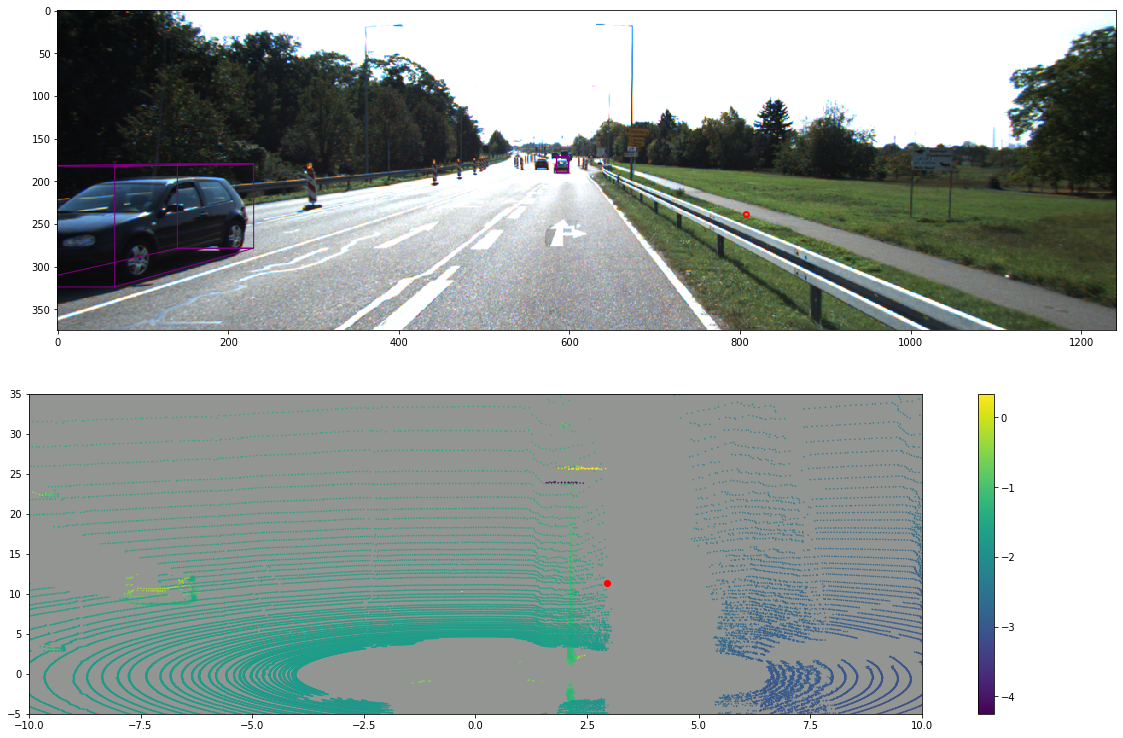

In [15]:
frame = '000033'
main(frame=frame)

In [16]:
def project_to_image(pts_3d, P):
    ''' Project 3d points to image plane.

    Usage: pts_2d = projectToImage(pts_3d, P)
      input: pts_3d: nx3 matrix
             P:      3x4 projection matrix
      output: pts_2d: nx2 matrix

      P(3x4) dot pts_3d_extended(4xn) = projected_pts_2d(3xn)
      => normalize projected_pts_2d(2xn)

      <=> pts_3d_extended(nx4) dot P'(4x3) = projected_pts_2d(nx3)
          => normalize projected_pts_2d(nx2)
    '''
    n = pts_3d.shape[0]
    pts_3d_extend = np.hstack((pts_3d, np.ones((n, 1))))
    #print(('pts_3d_extend shape: ', pts_3d_extend.shape))
    pts_2d = np.dot(pts_3d_extend, np.transpose(P))  # nx3
    pts_2d[:, 0] /= pts_2d[:, 2]
    pts_2d[:, 1] /= pts_2d[:, 2]
    return pts_2d[:, 0:2]


In [17]:
def compute_box_3d(obj, P):
    ''' Takes an object and a projection matrix (P) and projects the 3d
        bounding box into the image plane.
        Returns:
            corners_2d: (8,2) array in left image coord.
            corners_3d: (8,3) array in in rect camera coord.
    '''
    # compute rotational matrix around yaw axis
    R = roty(obj.ry)

    # 3d bounding box dimensions
    l = obj.l
    w = obj.w
    h = obj.h

    # 3d bounding box corners
    x_corners = [l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2, -l/2]
    y_corners = [0, 0, 0, 0, -h, -h, -h, -h]
    z_corners = [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2]

    # rotate and translate 3d bounding box
    corners_3d = np.dot(R, np.vstack([x_corners, y_corners, z_corners]))
    # print corners_3d.shape
    corners_3d[0, :] = corners_3d[0, :] + obj.t[0]
    corners_3d[1, :] = corners_3d[1, :] + obj.t[1]
    corners_3d[2, :] = corners_3d[2, :] + obj.t[2]
    # print 'cornsers_3d: ', corners_3d
    # only draw 3d bounding box for objs in front of the camera
    if np.any(corners_3d[2, :] < 0.1):
        corners_2d = None
        return corners_2d, np.transpose(corners_3d)

    # project the 3d bounding box into the image plane
    corners_2d = project_to_image(np.transpose(corners_3d), P)
    # print 'corners_2d: ', corners_2d
    return corners_2d, np.transpose(corners_3d)



In [18]:
def read_label(label_filename):
    lines = [line.rstrip() for line in open(label_filename)]
    objects = [Object3d(line) for line in lines]
    return objects


In [19]:
def roty(t):
    ''' Rotation about the y-axis. '''
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c,  0,  s],
                     [0,  1,  0],
                     [-s, 0,  c]])


In [20]:

class Object3d(object):
    ''' 3d object label '''

    def __init__(self, label_file_line):
        data = label_file_line.split(' ')
        data[1:] = [float(x) for x in data[1:]]

        # extract label, truncation, occlusion
        self.type = data[0]  # 'Car', 'Pedestrian', ...
        self.truncation = data[1]  # truncated pixel ratio [0..1]
        # 0=visible, 1=partly occluded, 2=fully occluded, 3=unknown
        self.occlusion = int(data[2])
        self.alpha = data[3]  # object observation angle [-pi..pi]

        # extract 2d bounding box in 0-based coordinates
        self.xmin = data[4]  # left
        self.ymin = data[5]  # top
        self.xmax = data[6]  # right
        self.ymax = data[7]  # bottom
        self.box2d = np.array([self.xmin, self.ymin, self.xmax, self.ymax])

        # extract 3d bounding box information
        self.h = data[8]  # box height
        self.w = data[9]  # box width
        self.l = data[10]  # box length (in meters)
        # location (x,y,z) in camera coord.
        self.t = (data[11], data[12], data[13])
        # yaw angle (around Y-axis in camera coordinates) [-pi..pi]
        self.ry = data[14]


In [22]:
label = read_label('../data/nusc_kitti/mini/KITTI/object/training/label_2/000000.txt')

In [78]:
left_cam, velo, label_data, calib_data = loadKittiFiles(frame)

In [79]:
velo.shape 

(34752, 4)

In [80]:
label_data.keys()

dict_keys(['pedestrian', 'bicycle', 'truck', 'motorcycle', 'barrier', 'car', 'traffic_cone', 'construction_vehicle'])

In [81]:
# gt label and number of instances
for key, arr in label_data.items():
    print(key, arr.shape)

pedestrian (15, 15)
bicycle (1, 15)
truck (3, 15)
motorcycle (1, 15)
barrier (17, 15)
car (9, 15)
traffic_cone (3, 15)
construction_vehicle (1, 15)


In [82]:
calib_data

{'P0': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'P1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'P2': array([1.26641720e+03, 0.00000000e+00, 8.16267020e+02, 0.00000000e+00,
        0.00000000e+00, 1.26641720e+03, 4.91507066e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]),
 'P3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'R0_rect': array([1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 'Tr_velo_to_cam': array([ 0.00348797, -0.99997086,  0.00679117,  0.01190664,  0.01859214,
        -0.00672519, -0.99980453, -0.32498627,  0.99982107,  0.00361355,
         0.01856814, -0.75900204]),
 'Tr_imu_to_velo': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [84]:
a = [0, 0.67, 0.67, 0.67, 0.67, 0, 0, 0]
a += -0.33

TypeError: 'float' object is not iterable

In [ ]:
"""
to generate bird eye view, we have to filter point cloud
first. which means we have to limit coordinates


"""
import numpy as np
import cv2
import os
import mayavi.mlab as mlab
# mlab.init_notebook()
res = 0.05
# image size would be 400x800
side_range = (-20, 20)
fwd_range = (-20, 20)

side_range = (-100, 100)
fwd_range = (-100, 100)


def load_pc(f):
    b = np.fromfile(f, dtype=np.float32)
    return b.reshape((-1, 4))[:, :3]

# a = 'data/testing/valodyne/000003.bin'
a = basedir + '/velodyne/000001.bin'
points = load_pc(a)

def gen_bev_map(pc, lr_range=[-10, 10], bf_range=[-20, 20], res=0.05):
    x = pc[:, 0]
    y = pc[:, 1]
    z = pc[:, 2]

    # filter point cloud
    f_filt = np.logical_and((x>bf_range[0]), (x<bf_range[1]))
    s_filt = np.logical_and((y>-lr_range[1]), (y<-lr_range[0]))
    filt = np.logical_and(f_filt, s_filt)
    indices = np.argwhere(filt).flatten()
    x = x[indices]
    y = y[indices]
    z = z[indices]

    # convert coordinates to
    x_img = (-y/res).astype(np.int32)
    y_img = (-x/res).astype(np.int32)
    # shifting image, make min pixel is 0,0
    x_img -= int(np.floor(lr_range[0]/res))
    y_img += int(np.ceil(bf_range[1]/res))

    # crop y to make it not bigger than 255
    height_range = (-2, 0.5)
    pixel_values = np.clip(a=z, a_min=height_range[0], a_max=height_range[1])
    def scale_to_255(a, min, max, dtype=np.uint8):
        return (((a - min) / float(max - min)) * 255).astype(dtype)
    pixel_values = scale_to_255(pixel_values, min=height_range[0], max=height_range[1])

    # according to width and height generate image
    w = 1+int((lr_range[1] - lr_range[0])/res)
    h = 1+int((bf_range[1] - bf_range[0])/res)
    im = np.zeros([h, w], dtype=np.uint8)
    im[y_img, x_img] = pixel_values
    cropped_cloud = np.vstack([x, y, z]).transpose()
    return im, cropped_cloud

im, cropped_cloud = gen_bev_map(points)
# cv2.imshow('rr', im)
# cv2.waitKey(0)


x = cropped_cloud[:,0]
y = cropped_cloud[:,1]
z = cropped_cloud[:,2]
mlab.points3d(x, y, z, z,  mode="point", colormap='spectral')
mlab.show()